In [1]:
### HW2 - Data Science for product management
#Erik Bacilio
#November 4, 2017

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display

In [102]:
# Loads data into data frame
df = pd.read_excel("Bank failure data.xlsx",sheetIndex=1)
df["Failed during 2010Q2"] = df["Failed during 2010Q2"].astype('category')
df["Failed during 2010Q2_cat"] = df["Failed during 2010Q2"].cat.codes
del df["Failed during 2010Q2"]
df.head(10)

,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Cert Number,Failed during 2010Q2_cat
0,Exchange Bank,2007Q4,14.90,19.36,32.852108,0.0,0.03,23.13,3.38,0.190681,20.16,99.07,160,0
1,Exchange Bank,2008Q1,14.30,20.86,33.542390,0.0,0.00,32.96,4.96,0.000000,21.23,99.45,160,0
2,Exchange Bank,2008Q2,14.15,20.89,34.140007,0.0,0.31,33.71,1.53,0.022408,19.69,97.94,160,0
3,Exchange Bank,2008Q3,14.13,18.74,34.038758,0.0,-0.02,34.99,3.80,0.147452,19.83,98.84,160,0
4,Exchange Bank,2008Q4,14.21,21.82,34.059328,0.0,1.21,37.14,3.86,0.057306,15.29,99.84,160,0
5,Exchange Bank,2009Q1,14.35,21.72,33.945133,0.0,0.04,34.82,4.98,0.016233,18.98,99.87,160,0
6,Exchange Bank,2009Q2,13.95,32.14,33.369534,0.0,0.45,34.93,4.76,0.016191,20.45,100.45,160,0
7,Exchange Bank,2009Q3,13.73,27.52,33.531905,0.0,1.76,34.60,0.91,0.015040,21.67,103.09,160,0
8,Exchange Bank,2009Q4,13.08,49.37,34.072142,0.0,1.89,34.24,1.26,1.904481,21.29,102.17,160,0
9,Exchange Bank,2010Q1,13.25,54.35,34.285794,0.0,0.12,34.49,1.53,1.770006,21.31,102.34,160,0


In [24]:
# Replaces the quartes column with integer expresion usign dictionary
df['Quarter']=df['Quarter'].replace({'2007Q4':2008,'2008Q1':2008.25,'2008Q2':2008.5,'2008Q3':2008.75,'2008Q4':2009,'2009Q1':2009.25,'2009Q2':2009.5,'2009Q3':2009.75,'2009Q4':2010,'2010Q1':2010.25})

In [25]:
# Biggest bank at the end of 2009
df_end2009=df.loc[df['Quarter'] == 2010] # 2010 -> end of 2009 start 2010
df_end2009=df_end2009.sort_values(by=['Size'], ascending=False)
print("Biggest banks measured by 'Size' at the end of 2009. Descending order")
print(df_end2009.head(10)[['Bank Name','Size']])

Biggest banks measured by 'Size' at the end of 2009. Descending order
                                              Bank Name       Size
2618                      Citibank (South Dakota), N.A.  99.777234
718                            Huntington National Bank  92.712911
78                           M&I Marshall & Ilsley Bank  92.529175
2998                            Westernbank Puerto Rico  76.485094
48                             Wilmington Trust Company  74.567707
2938                                         IBERIABANK  72.732142
728   First Financial Bank, National Association Ham...  70.567917
3028                    R-G Premier Bank of Puerto Rico  69.559126
418                                     AMCORE Bank, NA  64.406163
2588                                      Frontier Bank  63.883780


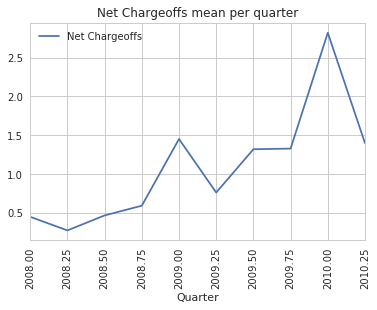

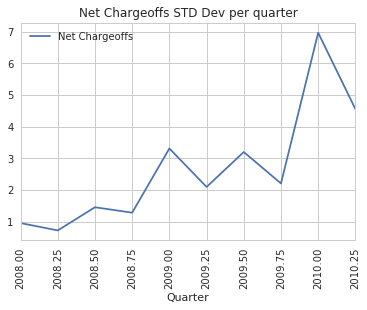

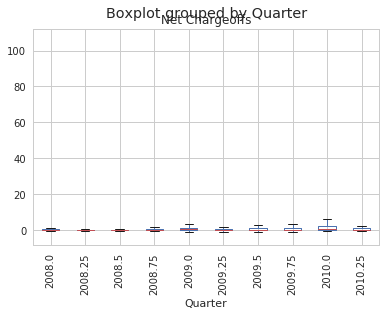

In [33]:
# Trends in Net Chargeoffs
mean_quarter = df.groupby('Quarter')[['Bank Name','Net Chargeoffs']].mean()
stddev_quarter = df.groupby('Quarter')[['Bank Name','Net Chargeoffs']].std()
from matplotlib import pyplot
mean_quarter.plot()
pyplot.title('Net Chargeoffs mean per quarter') # JUST GIVES TITLE TO THE SUBPLOT
pyplot.xticks(rotation=90)
pyplot.show()
stddev_quarter.plot() 
pyplot.title('Net Chargeoffs STD Dev per quarter') # JUST GIVES TITLE TO THE SUBPLOT
pyplot.xticks(rotation=90)
pyplot.show() # DISPLAYS THE FIGURE
boxplot_period=df.boxplot(column='Net Chargeoffs', by='Quarter')
pyplot.xticks(rotation=90)
pyplot.show()

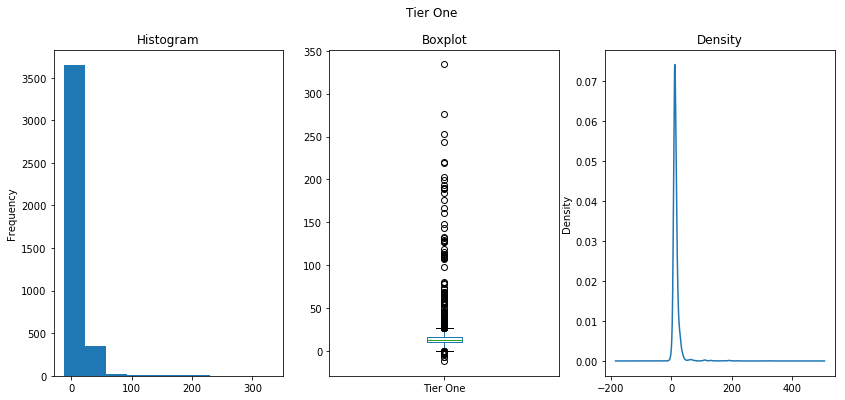

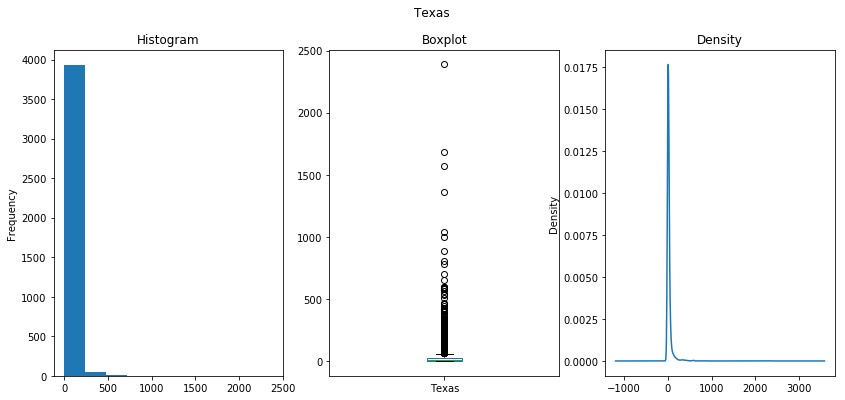

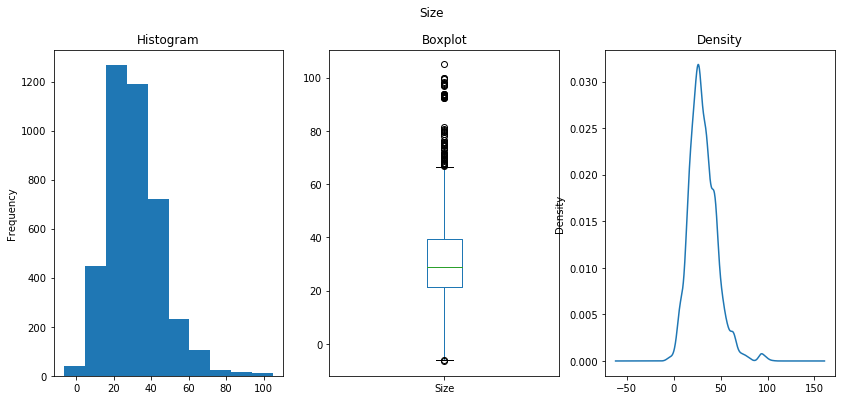

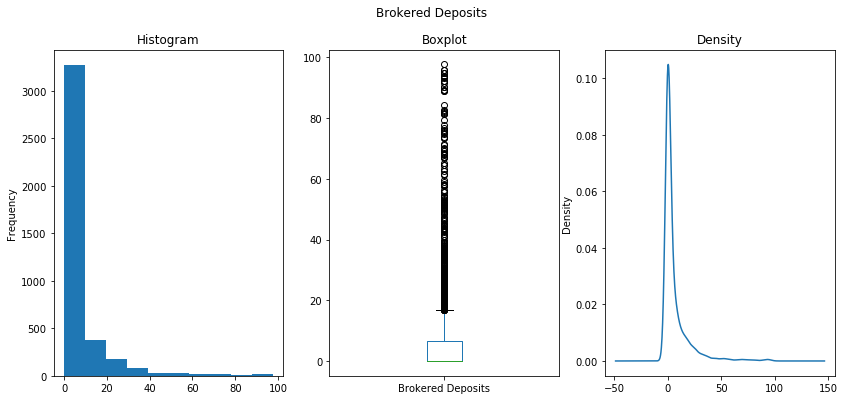

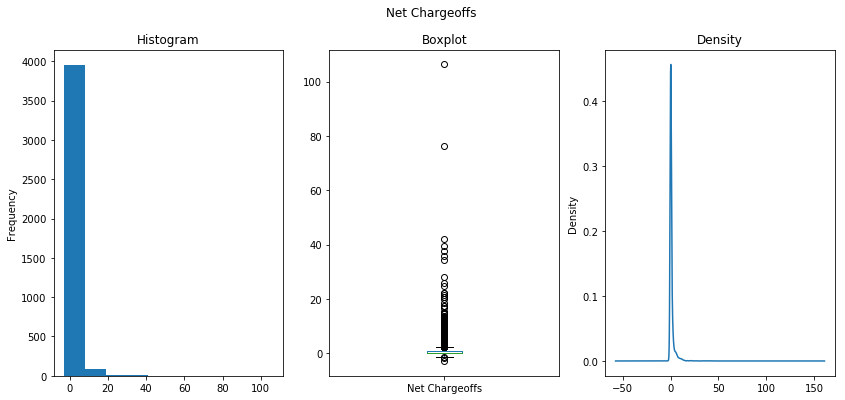

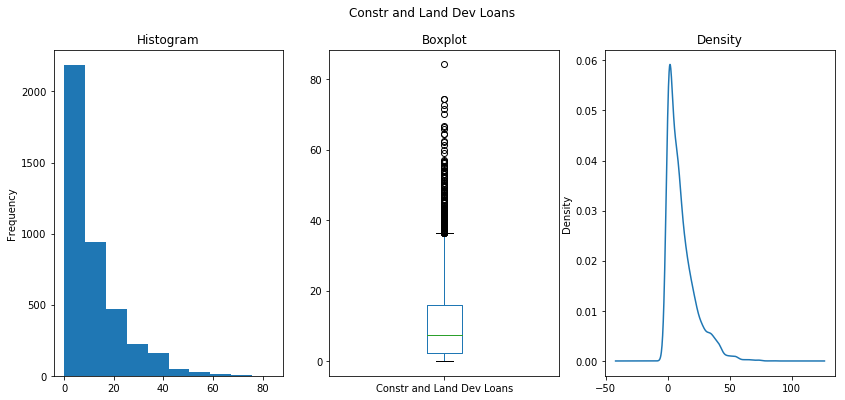

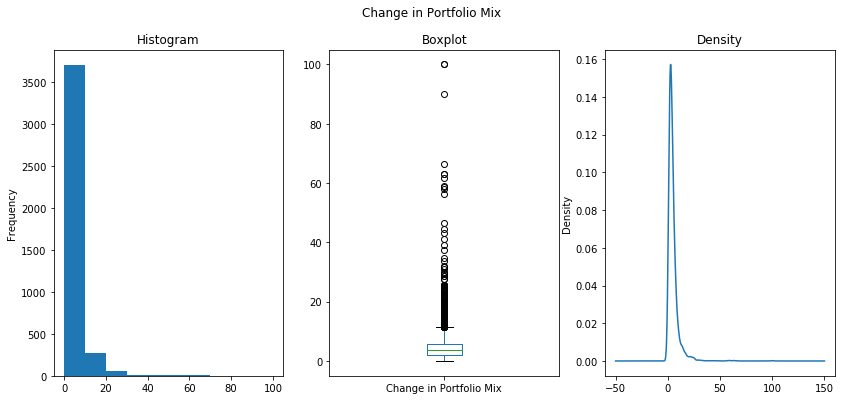

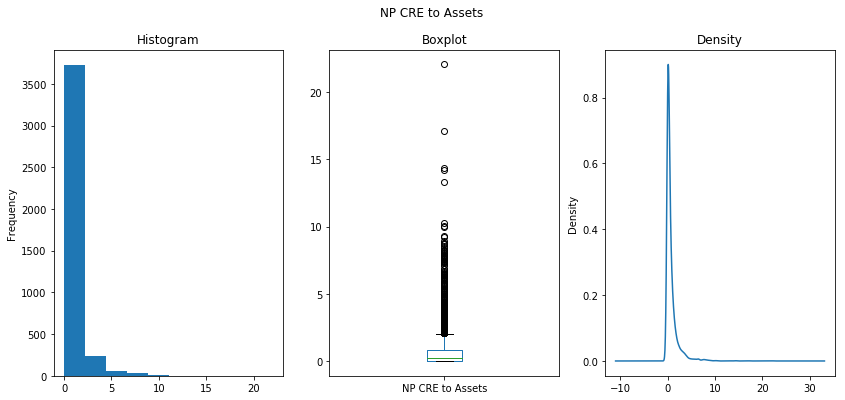

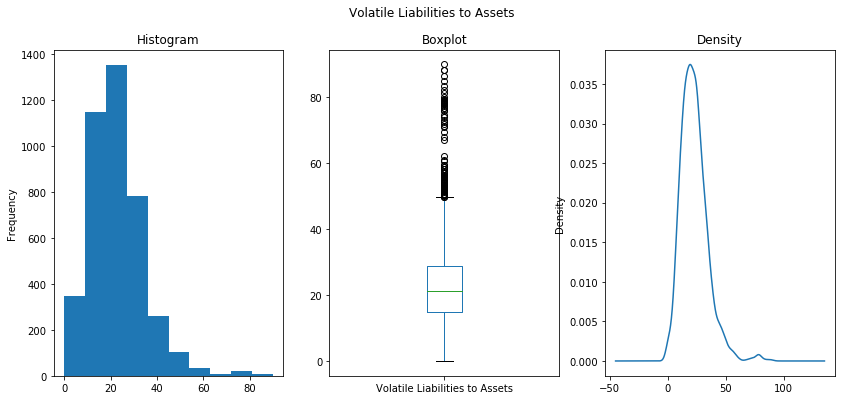

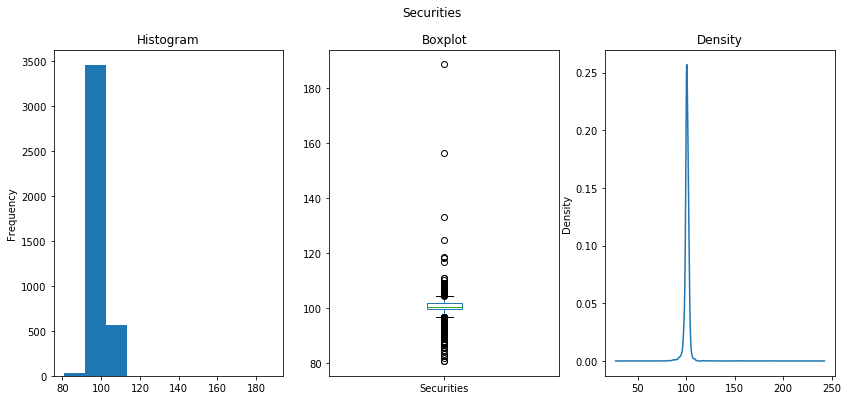

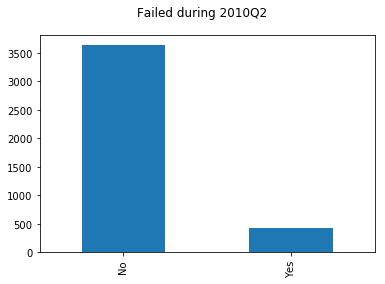

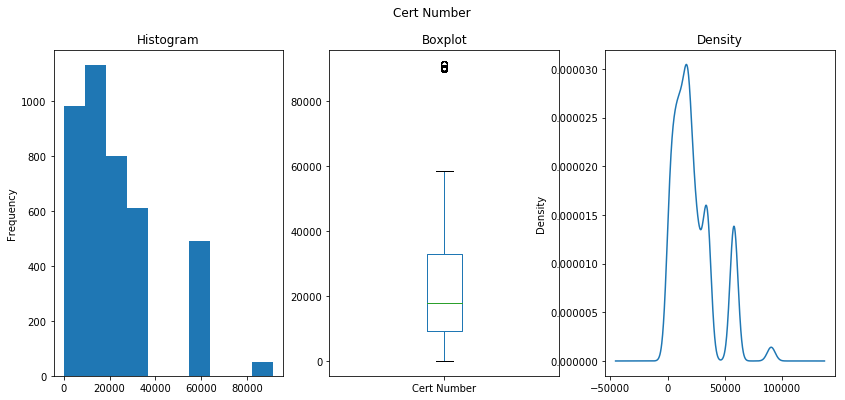

In [145]:
# Explore data
from matplotlib import pyplot
for i in df.columns[2:]:
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRNGS
        from collections import Counter # CALLS COUNTER FUNCTION
        string_counts = Counter(df[i]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
        pd.Series(Counter(string_counts)).plot(kind='bar') # CREATES A SERIE FROM THE LIST
        pyplot.suptitle(i) # GIVES THE MAIN TITLE
        pyplot.show() # DISPLAYS THE FIGURE
    else:
        pyplot.figure(i, figsize=(14, 6)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
        pyplot.subplot(131) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 1
        df[i].plot.hist() # CREATES A HISTOGRAM FROM THE DATAFRAME IN MEMORY
        pyplot.title('Histogram') # JUST GIVES TITLE TO THE SUBPLOT
        pyplot.subplot(132) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 2
        df[i].plot.box() # CREATES A BOXPLOT GRAPH FROM THE DATAFRAME IN MEMORY
        pyplot.title('Boxplot') # JUST GIVES TITLE TO THE SUBPLOT
        pyplot.subplot(133) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 3
        df[i].plot.kde() # CREATES A DENSITY GRAPH FROM THE DATAFRAME IN MEMORY
        pyplot.title('Density') # JUST GIVES TITLE TO THE SUBPLOT
        pyplot.suptitle(i) # GIVES THE MAIN TITLE
        pyplot.show() # DISPLAYS THE FIGURE

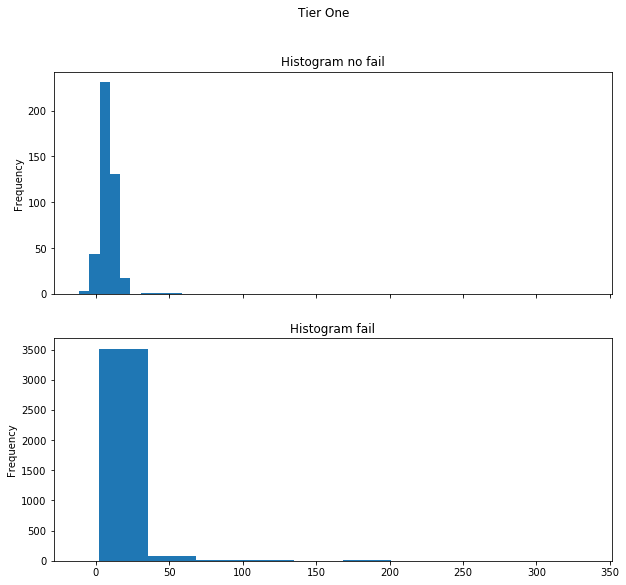

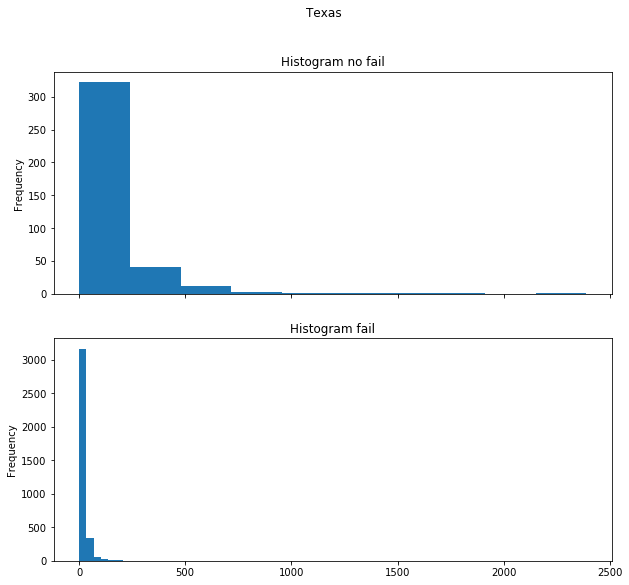

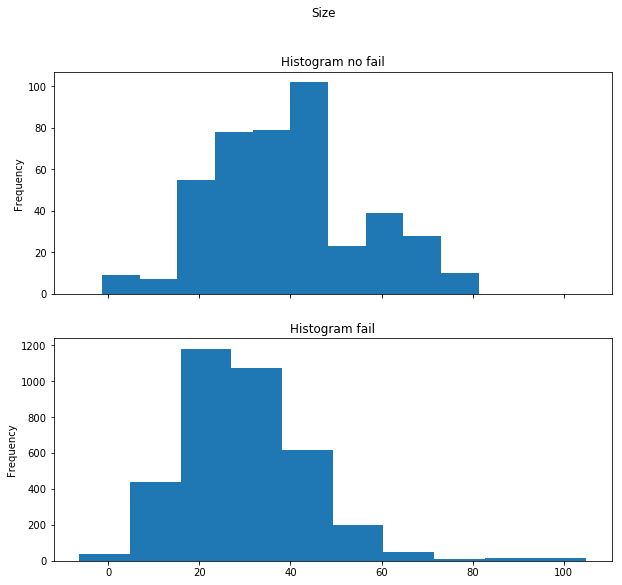

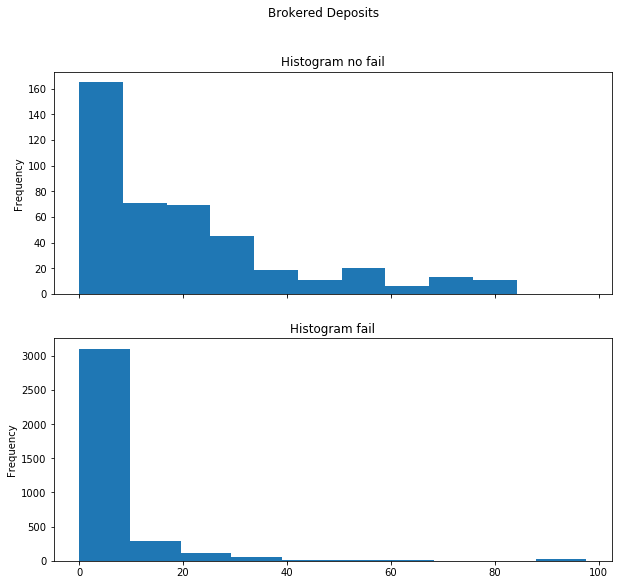

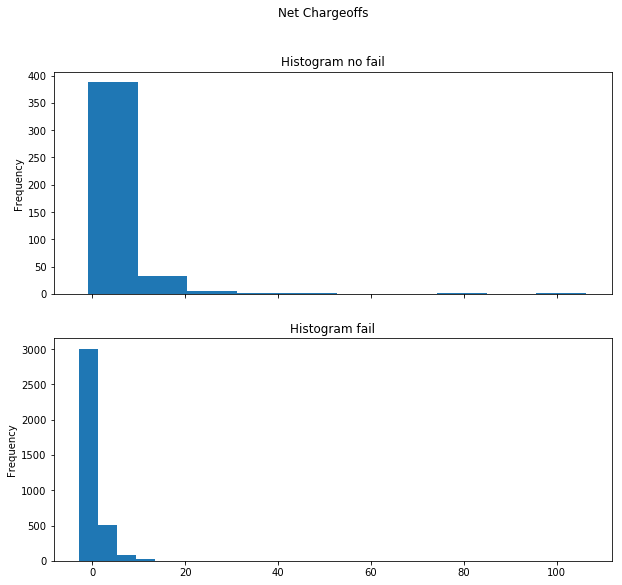

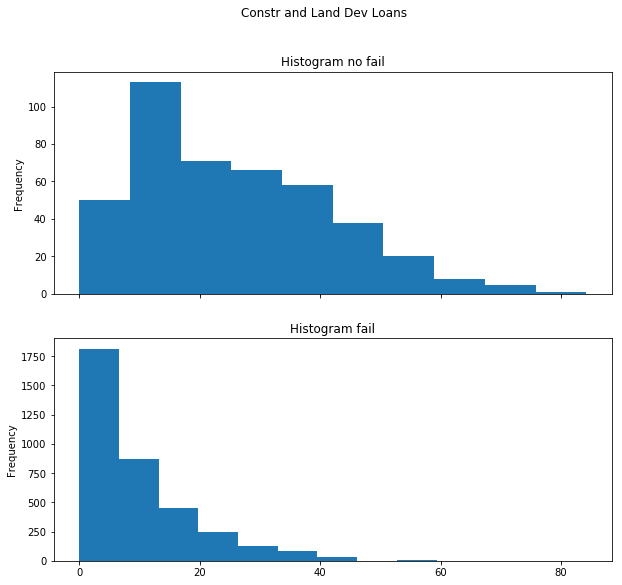

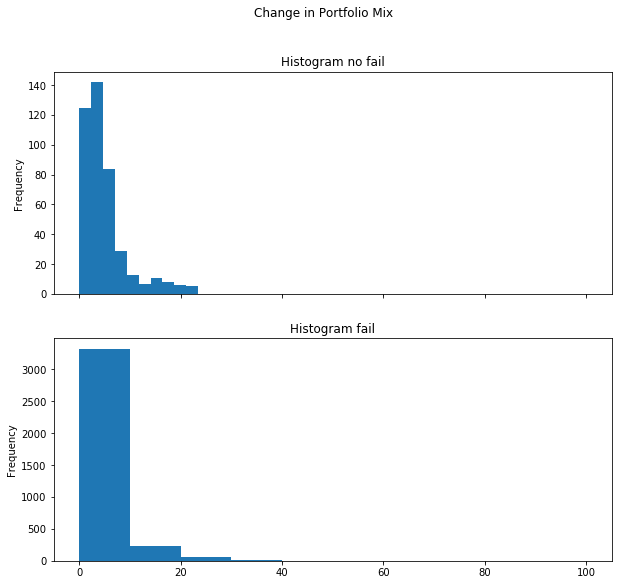

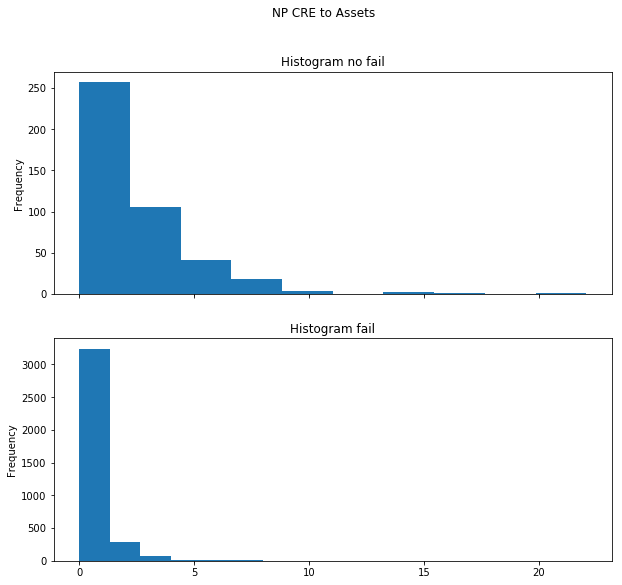

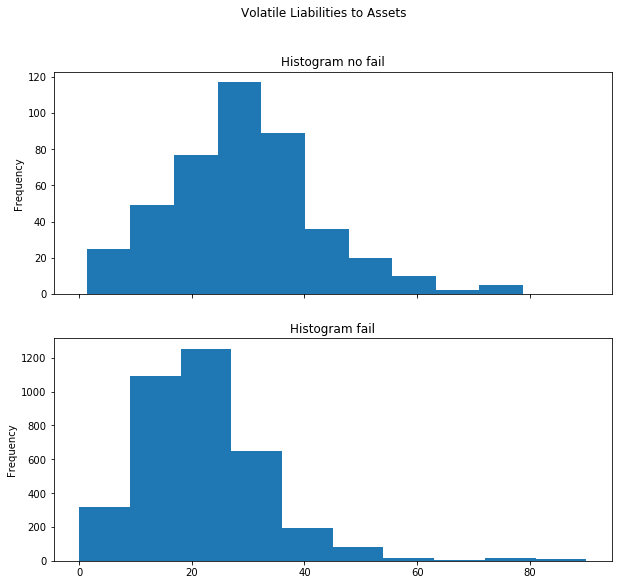

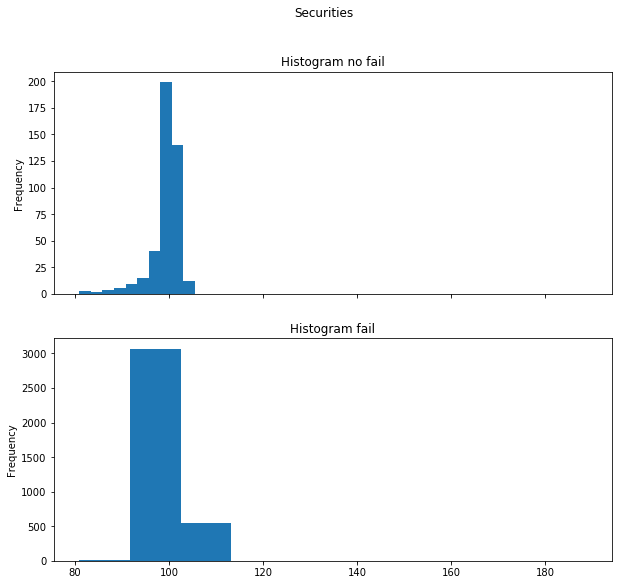

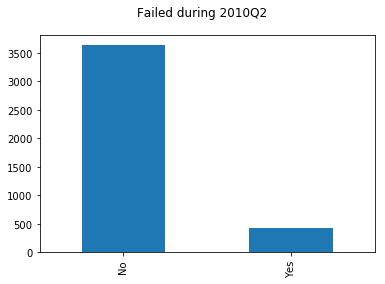

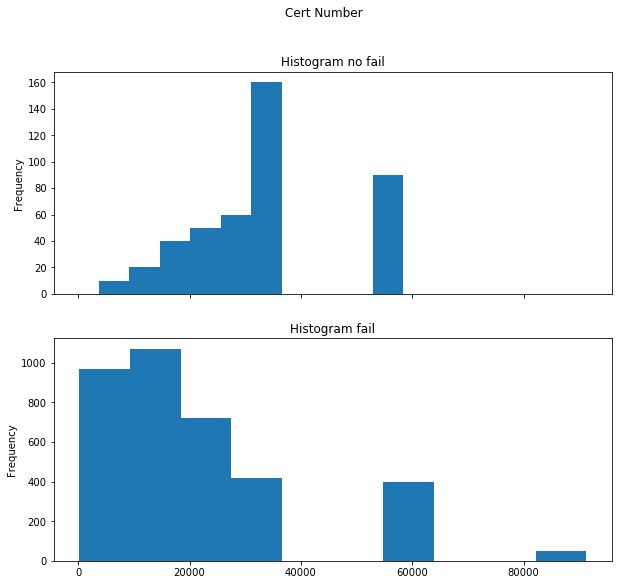

In [37]:
# compare histograms
df_sicontrol=df.loc[df['Failed during 2010Q2'] == "Yes"]
df_nocontrol=df.loc[df['Failed during 2010Q2'] == "No"]
from matplotlib import pyplot
for i in df_sicontrol.columns[2:]:
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRNGS
        from collections import Counter # CALLS COUNTER FUNCTION
        string_counts = Counter(df[i]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
        pd.Series(Counter(string_counts)).plot(kind='bar') # CREATES A SERIE FROM THE LIST
        pyplot.suptitle(i) # GIVES THE MAIN TITLE
        pyplot.show() # DISPLAYS THE FIGURE
    else:
        pyplot.figure(i, figsize=(10, 9)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
        ax1 = pyplot.subplot(211) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 1
        df_sicontrol[i].plot.hist() # CREATES A HISTOGRAM FROM THE DATAFRAME IN MEMORY
        pyplot.title('Histogram no fail') # JUST GIVES TITLE TO THE SUBPLOT
        ax2 = pyplot.subplot(212, sharex=ax1) # CREATES A SUBPLOT IN A FIGURE WITH  1 ROW AND 3 COLUMNS AND POSITION 2
        df_nocontrol[i].plot.hist() # CREATES A BOXPLOT GRAPH FROM THE DATAFRAME IN MEMORY
        pyplot.title('Histogram fail') # JUST GIVES TITLE TO THE SUBPLOT
        pyplot.suptitle(i) # GIVES THE MAIN TITLE
        pyplot.show() # DISPLAYS THE FIGURE

In [103]:
# delete rows with null values
import numpy as np
from collections import Counter # CALLS COUNTER FUNCTION
# COUNTER FUNCTION FOR NAN VALUES IN NUMERIC VARIABLES
for i in df.columns: # LOOP THORUGH COLUMNS IN DF
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRINGS
        continue # JUMP FOR CASES OF STRING VARIABLE
    else: # BE CAREFULL!!!! IT IS MEANT FOR NUMERIC VARIABLES BUT ADDITIONAL CHECK SHOULD BE IMPLEMENTED
        types = [] # LIST HOLDING NAN INFO 
        for z in df[i]: # LOOP THOURGH ELEMENTS IN COLUMN 
            nanValidation = np.isnan(z) # CHECK IF VALUE IS NAN, VALUE IS NAN -> NAN
            types.append(nanValidation) # APPENDS RESULT TO LIST
        string_counts = Counter(types) # CREATES AN OBJECT THAT COUNTS THE REPETITIONS OF A STRING
        print(string_counts) # GIVES RESULT OF NAN VALIDATION
        
# REMOVEs ROWS IN WHICH THERE ARE NAN VALUES
for i in df.columns: # LOOP THORUGH COLUMNS IN DF
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRINGS
        continue  #JUMP FOR CASES OF STRING VARIABLE
    else: # BE CAREFULL!!!! IT IS MEANT FOR NUMERIC VARIABLES BUT ADDITIONAL CHECK SHOULD BE IMPLEMENTED
        df = df[np.isfinite(df[i])] # ONLY KEEPSROWS WITH NON-NAN VALUES IN COLUMN i

# MANUAL CHECK FOR NAN VALUES. NON NAN VALUES -> EMPTY LISTS
for i in df.columns: # LOOP THORUGH COLUMNS IN DF
    if type(df[i][1])==type("string"): # HANDLES CASES IN WHICH OBSERVATIONS ARE STRINGS
        continue # JUMP FOR CASES OF STRING VARIABLE
    else: # BE CAREFULL!!!! IT IS MEANT FOR NUMERIC VARIABLES BUT ADDITIONAL CHECK SHOULD BE IMPLEMENTED
        missingValuesIndexList = [] # CREATES A LIST TO CONTAIN INDEXES OF ROWS WITH NAN VALUES
        counter = 0 # IS COUNTER TO IDENTIFY THE INDEX
        for z in df[i]: # LOOPS THOURGH VALUES IN COLUMN i
            nanValidation = np.isnan(z) # CHECK IF VALUE IS NAN, VALUE IS NAN -> NAN
            if nanValidation == True: # IF NAN VALUE IS FOUND
                missingValuesIndexList.append(counter) # ADDS THE INDEX TO THE LIST ABOVE DEFINED
            counter += 1 # INCREASE THE COUNTER TO THE NEXT INDEX
        print(missingValuesIndexList) # PRINTS LIST CREATED FOR THE COLUMN, NON NAN VALUES -> EMPTY LISTS

Counter({False: 4060})
Counter({False: 3997, True: 63})
Counter({False: 4060})
Counter({False: 4040, True: 20})
Counter({False: 4054, True: 6})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
Counter({False: 4060})
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


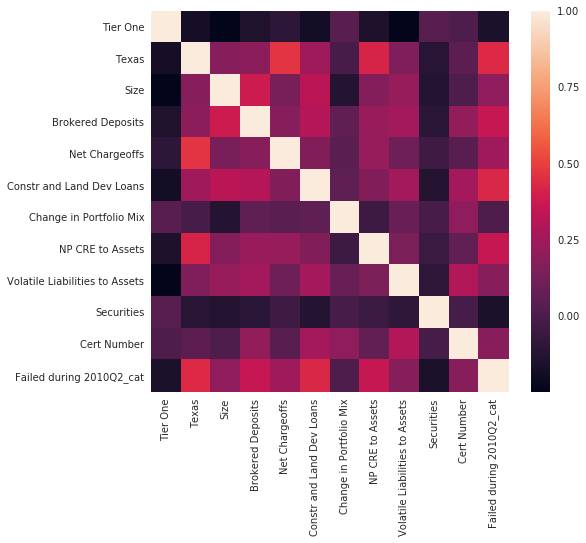

In [104]:
# create heatmap
from matplotlib import pyplot
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pyplot.figure(1, figsize=(8, 7))
sns.heatmap(df.corr())
pyplot.xticks(rotation=90)
pyplot.yticks(rotation=0)
pyplot.show()

In [96]:
# create training and testing sets
# 1) create a set of the names of the banks, 2) choose 70% BANKS training and 30% as test 3) slice the complete DF in train and test

# 1)
import random
banks = list(df['Bank Name'].unique()) # CREATES A LIST OF UNIQUE BANK NAMES IN THE DATA FRAME
banksNumber=len(banks) # RETURNS THE NUMBER OF DIFFERENT BANKS IN THE DATAFRAME
trainNumber=int(round(banksNumber*0.7,0)) # DETERMINES THE NUMBER OF BANKS USED FOR TRAIN
testNumber=int(banksNumber-trainNumber) # DETERMINES THE NUMBER OF BAKS USED FOR TESTING 
trainIndexes=random.sample(range(banksNumber-1), trainNumber) # DETERMINES RANDOM INDEXES TO CHOOSE THE BANKS FOR TRAIN AND TESTING

# 2)
banksTrain=[]
for i in trainIndexes:
    aggregator = banks[i] # PICKS THE NAME OF THE BANK ACCORDING TO THE INDEX
    banksTrain.append(aggregator) # APPENDS THE NAME TO THE LIST
banksTest=banks
for i in banksTrain:
    banksTest.remove(i) # TEST LIST BY REMOVING THE BANK NAMES FOR TRAIN 

# 3)
trainDF = pd.DataFrame() # CREATES EMPTY DATAFRAME TO FILL!!!
for k in banksTrain:
    aggregator=df.loc[df['Bank Name'] == k] # PINKS OBSERVATIONS ACCORDING TO BANK NAME
    trainDF = trainDF.append(aggregator, ignore_index = True) # AGGREGATES DATA

testDF = pd.DataFrame() 
for k in banksTest:
    aggregator=df.loc[df['Bank Name'] == k] # PINKS OBSERVATIONS ACCORDING TO BANK NAME
    testDF = testDF.append(aggregator, ignore_index = True) # AGGREGATES DATA

In [101]:
# fit training sets
# 1) use classification 2) tune parameters 3) choose best model
df["Failed during 2010Q2"] = df["Failed during 2010Q2"].astype('category')
df["Failed during 2010Q2_cat"] = df["Failed during 2010Q2"].cat.codes
del df['column_name']
#df.loc[df['Failed during 2010Q2_cat'] == 1]
#df(["Failed during 2010Q2_cat"]==1)


,Bank Name,Quarter,Tier One,Texas,Size,Brokered Deposits,Net Chargeoffs,Constr and Land Dev Loans,Change in Portfolio Mix,NP CRE to Assets,Volatile Liabilities to Assets,Securities,Failed during 2010Q2,Cert Number,Failed during 2010Q2_cat
410,"AMCORE Bank, NA",2008.00,8.56,10.54,67.802755,16.54,0.48,20.51,0.94,0.885634,18.96,99.36,Yes,3735,1
411,"AMCORE Bank, NA",2008.25,8.12,25.44,67.764845,16.62,1.39,19.87,1.03,1.233247,15.06,100.52,Yes,3735,1
412,"AMCORE Bank, NA",2008.50,7.86,38.35,67.760032,21.47,0.34,19.54,1.36,1.343371,15.30,98.77,Yes,3735,1
413,"AMCORE Bank, NA",2008.75,8.01,43.35,67.477142,27.93,4.89,18.28,1.63,1.240570,20.64,97.41,Yes,3735,1
414,"AMCORE Bank, NA",2009.00,7.63,71.74,67.552639,31.29,5.86,16.63,2.06,1.768327,16.45,98.47,Yes,3735,1
415,"AMCORE Bank, NA",2009.25,6.22,88.99,68.075130,31.62,3.58,16.35,2.04,1.826487,19.66,100.45,Yes,3735,1
416,"AMCORE Bank, NA",2009.50,6.06,100.26,67.200092,28.65,2.40,15.73,1.94,2.105869,16.74,98.79,Yes,3735,1
417,"AMCORE Bank, NA",2009.75,4.09,154.90,65.984480,26.09,7.25,14.65,1.87,2.564831,18.09,99.25,Yes,3735,1
418,"AMCORE Bank, NA",2010.00,3.94,158.45,64.406163,24.15,9.08,14.76,5.24,2.852586,16.96,97.76,Yes,3735,1
419,"AMCORE Bank, NA",2010.25,3.86,175.59,62.165154,24.93,6.29,15.65,6.95,3.073275,21.76,98.42,Yes,3735,1


In [ ]:
# predict bank failure for new data sample

In [ ]:
#Get top 2 banks that are most likely to fail